In [213]:
import sys
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import scipy as sp
import seaborn as sns
import IPython
import sklearn
import warnings 
warnings.simplefilter('ignore')
%matplotlib Inline

In [214]:
df = pd.read_csv('/Users/ali/Desktop/predict s&p/precictions&p.csv')
df.shape

(50, 6)

In [215]:
df.head()

,year,"Inflation, consumer prices (annual %)",Real interest rate (%),GDP growth (annual %),"Unemployment, total (% of total labor force)",Sandp_500_Historical_Annual_Returns
0,1972,3.272278,0.887229,5.258907,5.6,15.63
1,1973,6.177760,2.409735,5.645723,4.9,-17.37
2,1974,11.054805,1.651064,-0.540552,5.6,-29.72
3,1975,9.143147,-1.281419,-0.205456,8.5,31.55
4,1976,5.744813,1.266892,5.388139,7.7,19.15


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   year                                          50 non-null     int64  
 1   Inflation, consumer prices (annual %)         50 non-null     float64
 2   Real interest rate (%)                        50 non-null     float64
 3   GDP growth (annual %)                         50 non-null     float64
 4   Unemployment, total (% of total labor force)  50 non-null     float64
 5   Sandp_500_Historical_Annual_Returns           50 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 2.5 KB


In [217]:
df.tail()

,year,"Inflation, consumer prices (annual %)",Real interest rate (%),GDP growth (annual %),"Unemployment, total (% of total labor force)",Sandp_500_Historical_Annual_Returns
45,2017,2.130110,2.157870,2.255680,4.36,19.42
46,2018,2.442583,2.456470,2.918857,3.90,-6.24
47,2019,1.812210,3.432389,2.288870,3.67,28.88
48,2020,1.233584,2.311078,-3.404590,8.05,16.26
49,2021,4.697859,-0.869249,5.671107,5.35,26.89


In [218]:
df.describe()

,year,"Inflation, consumer prices (annual %)",Real interest rate (%),GDP growth (annual %),"Unemployment, total (% of total labor force)",Sandp_500_Historical_Annual_Returns
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,1996.50000,3.913957,3.881705,2.726414,6.255800,9.393000
std,14.57738,2.913553,2.447615,2.160849,1.587217,16.719239
min,1972.00000,-0.355546,-1.281419,-3.404590,3.670000,-38.490000
25%,1984.25000,2.144589,2.044742,1.852898,5.130000,0.265000
50%,1996.50000,3.092831,3.489003,2.789510,5.790000,12.590000
75%,2008.75000,4.598528,6.155333,4.146532,7.327500,22.652500
max,2021.00000,13.549202,8.594620,7.236633,9.700000,34.110000


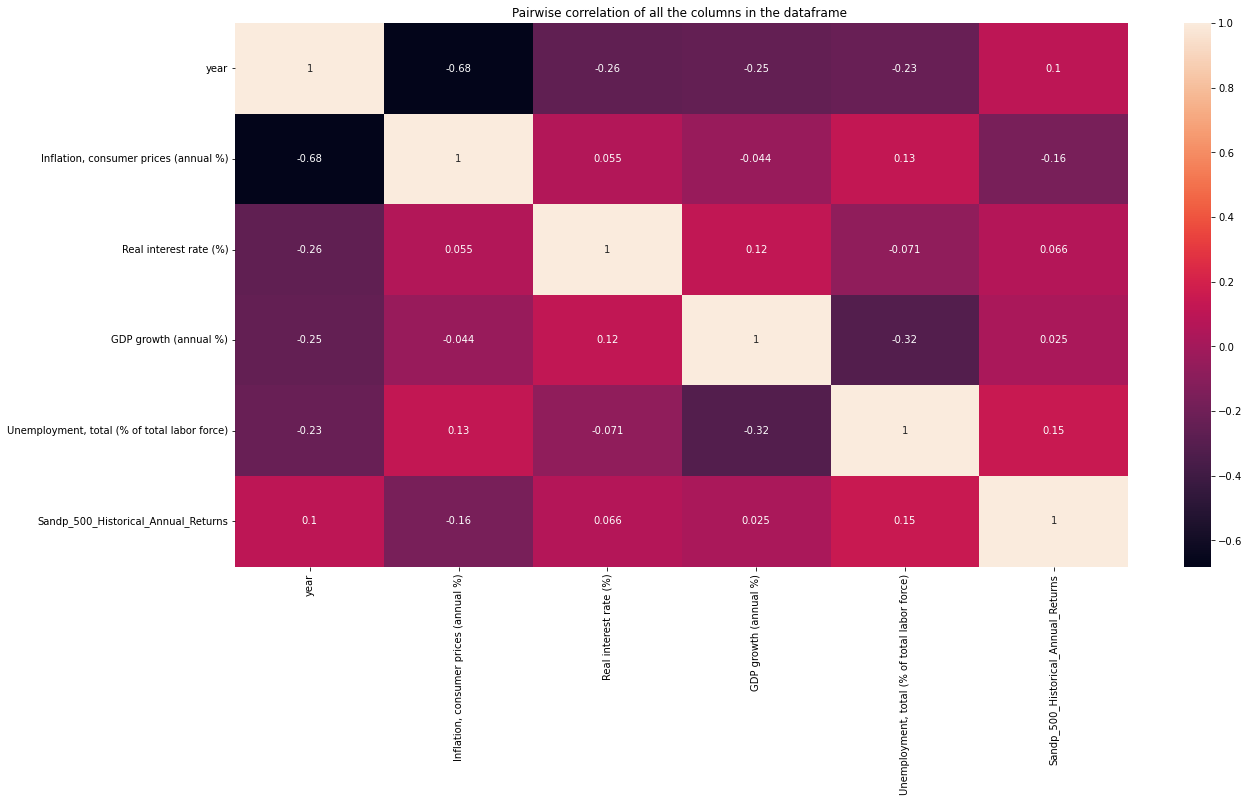

In [219]:
plt.figure(figsize = (20,10))
sns.heatmap(data= df.corr(), annot= True )
plt.title("Pairwise correlation of all the columns in the dataframe ")
plt.show()

In [220]:
#spliting the data frame into X_train, X_test, y_train, y_test
import sklearn
from sklearn.model_selection import train_test_split
X=df.drop(columns=['Sandp_500_Historical_Annual_Returns'])
y=df['Sandp_500_Historical_Annual_Returns']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [221]:
from sklearn import datasets, linear_model, metrics
#k-nearest neighbors algorithm for regression
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=1)
reg.fit(X_train, y_train)
print("Test set predictions:\n{}".format(reg.predict(X_test)))
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set predictions:
[ 31.01  26.33  -9.73  13.41  31.55  31.01   0.     8.99   7.06 -11.5
   8.99  13.62  31.01]
Test set R^2: -1.40


In [222]:
y_pred =  reg.predict(X_test)
print(metrics.mean_absolute_error(y_test,y_pred_KNN))
print(mean_absolute_percentage_error(y_test, y_pred_KNN))
print(metrics.mean_squared_error(y_test,y_pred_KNN)) 

19.49846153846154
179.23276145750722
627.5948000000001


In [223]:
from sklearn.metrics import r2_score
R_squared_value=r2_score(y_test,y_pred )

#view R-squared value
print(R_squared_value)

-1.4029191539656463


In [224]:
#implementing Linear regression 
lr = LinearRegression().fit(X_train, y_train)
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

lr.coef_: [ 0.120744    0.15332308  0.72436108 -0.08224622  1.27004175]
lr.intercept_: -242.88531201862213
Test set score: 0.10


In [225]:
y_pred_reg =  lr.predict(X_test)
from sklearn import metrics
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print(metrics.mean_absolute_error(y_test,y_pred_reg))
print(mean_absolute_percentage_error(y_test, y_pred_reg))
print(metrics.mean_squared_error(y_test,y_pred_reg)) 

12.244901076551754
130.23149706600046
235.33593326279683


In [226]:
from sklearn.metrics import r2_score
R_squared_value=r2_score(y_test, y_pred_reg)

#view R-squared value
print(R_squared_value)

0.09895170952092736


In [227]:
#implementing Ridge regression
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Test set score: 0.10


In [228]:
y_pred_ridge =  ridge.predict(X_test)
print(metrics.mean_absolute_error(y_test,y_pred_ridge))
print(mean_absolute_percentage_error(y_test, y_pred_ridge))
print(metrics.mean_squared_error(y_test,y_pred_ridge)) 

12.250593192760107
130.27151731031134
235.89212436526785


In [229]:
r_squared_ridge = ridge.score(X, y)

#view R-squared value
print(r_squared_ridge)

0.0394775678750916


In [230]:

ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))


Test set score: 0.08


In [231]:
y_pred_ridge =  ridge10.predict(X_test)
print(metrics.mean_absolute_error(y_test,y_pred_ridge))
print(mean_absolute_percentage_error(y_test, y_pred_ridge))
print(metrics.mean_squared_error(y_test,y_pred_ridge)) 

12.293905213880652
130.5965888719872
239.9820661202583


In [232]:
R_squared_value=r2_score(y_test,y_pred_ridge )

#view R-squared value
print(R_squared_value)

0.08116271312538148


In [233]:

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))


Test set score: 0.10


In [234]:
y_pred_ridge =  ridge01.predict(X_test)
print(metrics.mean_absolute_error(y_test,y_pred_ridge))
print(mean_absolute_percentage_error(y_test, y_pred_ridge))
print(metrics.mean_squared_error(y_test,y_pred_ridge)) 

12.245489391061584
130.23561381712673
235.3926535568724


In [235]:
R_squared_value=r2_score(y_test,y_pred_ridge )

#view R-squared value
print(R_squared_value)

0.09873454028840223


In [236]:
#implementing Lasso regression
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Test set score: 0.07
Number of features used: 4


In [237]:
y_pred_lasso = lasso.predict(X_test)
print(metrics.mean_absolute_error(y_test,y_pred_lasso))
print(mean_absolute_percentage_error(y_test, y_pred_lasso))
print(metrics.mean_squared_error(y_test,y_pred_lasso)) 

12.601921244410711
134.58671659400966
242.06054439555038


In [238]:
R_squared_value=r2_score(y_test, y_pred_lasso)

#view R-squared value
print(R_squared_value)

0.07320468788552803


In [239]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train) 
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Test set score: 0.10
Number of features used: 5


In [240]:
y_pred_lasso = lasso001.predict(X_test)
print(metrics.mean_absolute_error(y_test,y_pred_lasso))
print(mean_absolute_percentage_error(y_test, y_pred_lasso))
print(metrics.mean_squared_error(y_test,y_pred_lasso)) 

12.242707251516597
130.23974043383103
235.36535790368913


In [241]:
R_squared_value=r2_score(y_test, y_pred_lasso)

#view R-squared value
print(R_squared_value)

0.09883904919742137


In [242]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)                                                    
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Test set score: 0.10
Number of features used: 5


In [243]:
y_pred_lasso = lasso00001.predict(X_test)
print(metrics.mean_absolute_error(y_test,y_pred_lasso))
print(mean_absolute_percentage_error(y_test, y_pred_lasso))
print(metrics.mean_squared_error(y_test,y_pred_lasso)) 

12.2448791397379
130.2315794853033
235.33622606579866


In [244]:
R_squared_value=r2_score(y_test, y_pred_lasso)

#view R-squared value
print(R_squared_value)

0.09895058844417304


In [245]:
#implementing Decision TreeRegressor
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor().fit(X_train, y_train)
print("Test set score: {:.2f}".format(tree.score(X_test, y_test)))

Test set score: -1.25


In [246]:
# Random Forests Regression Model
from sklearn.ensemble import RandomForestRegressor

# create random forest regression object
forest = RandomForestRegressor(n_estimators = 100,oob_score = 'TRUE',n_jobs = -1,random_state =0)

# train the model using the training sets
model_forest = forest.fit(X_train, y_train)

  
# variance score
print('Variance score: {}'.format(forest.score(X_test, y_test)))

Variance score: -0.4456799202606212


In [247]:
y_pred =  model_forest.predict(X_test)
print(metrics.mean_absolute_error(y_test,y_pred_forest))
print(mean_absolute_percentage_error(y_test, y_pred_forest))
print(metrics.mean_squared_error(y_test,y_pred_forest)) 

13.920461538461536
142.589458847803
377.5829074076922


In [248]:
R_squared_value=r2_score(y_test,y_pred )

#view R-squared value
print(R_squared_value)

-0.4456799202606212
